In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)


2.3.0
2.4.0


In [2]:
import os
os.chdir('F:/DLCVNLP/TF 2 Assignment')

In [3]:
data = pd.read_excel('Real estate valuation data set (1).xlsx')

In [4]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


##### Drop unecessary variable

In [5]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


### Sr_no varable is not important and transaction data is less correlated with our dependent variable so descard them

In [6]:
data.drop(['No','X1 transaction date'],axis=1,inplace=True)

In [7]:
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
X = pd.DataFrame(data.iloc[:,0:5])
y = pd.DataFrame(data.iloc[:,[5]])


In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

#### Different features have different scale so scaled them

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### ANN with Adam optimizers

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1,activation='linear')
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
8/8 [==============================] - 0s 32ms/step - loss: 1554.9254 - val_loss: 1711.2257
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 1085.3833 - val_loss: 609.5370
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 354.9043 - val_loss: 265.9381
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 128.3953 - val_loss: 288.8449
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 116.1505 - val_loss: 207.0900
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 91.0491 - val_loss: 183.1338
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 71.4591 - val_loss: 165.0629
Epoch 8/50
8/8 [==============================] - 0s 7ms/step - loss: 65.4630 - val_loss: 159.1329
Epoch 9/50
8/8 [==============================] - 0s 7ms/step - loss: 60.4467 - val_loss: 151.4411
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 57.2173 - val_loss: 148.1103


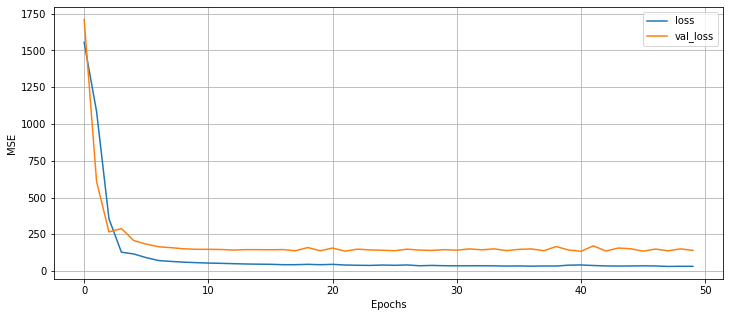

In [13]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE');

### Model with early stop point

In [14]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Model_for_house_price_prediction.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
history1 = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/200
8/8 [==============================] - 2s 289ms/step - loss: 41.5595 - val_loss: 165.2206
Epoch 2/200
8/8 [==============================] - 0s 15ms/step - loss: 40.8997 - val_loss: 137.6729
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 35.3657 - val_loss: 139.2079
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 37.3253 - val_loss: 160.2082
Epoch 5/200
8/8 [==============================] - 0s 12ms/step - loss: 33.4902 - val_loss: 134.8730
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 30.2151 - val_loss: 152.0128
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 32.2401 - val_loss: 159.1912
Epoch 8/200
8/8 [==============================] - 0s 11ms/step - loss: 36.0787 - val_loss: 132.9855
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 32.0727 - val_loss: 157.4592
Epoch 10/200
8/8 [==============================] - 0s 7ms/step - loss: 31.8098 - val_loss: 144

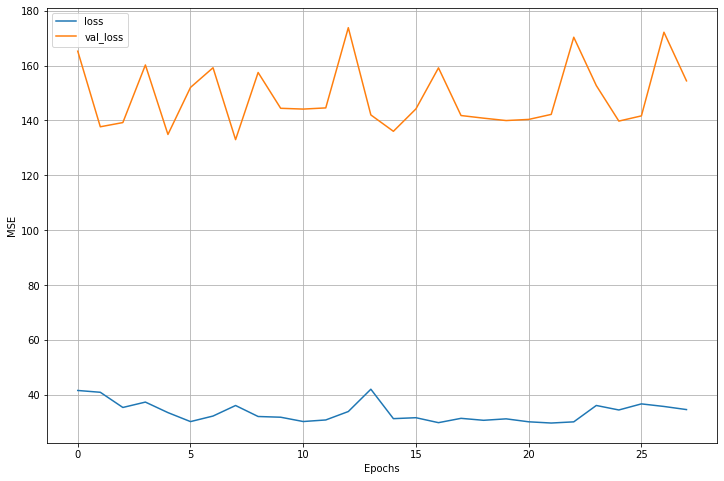

In [15]:
pd.DataFrame(history1.history).plot(figsize=(12, 8))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE');